# Bibliotecas, Importações e Transformações Iniciais

**Importando bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
palette = sb.color_palette('rocket_r')
sb.set_theme(style="ticks")
import os
import datetime as dt
import sqlite3
import time

**Importando dados**

In [2]:
df_1 = pd.read_csv(r'C:\Users\jorge\Desktop\Python\PrecoCombustiveis\dados_historicos\ca-2019-01.txt',
                 sep=';', parse_dates=True, encoding='latin-1')
df_2 = pd.read_csv(r'C:\Users\jorge\Desktop\Python\PrecoCombustiveis\dados_historicos\ca-2019-02.txt',
                 sep=';', parse_dates=True, encoding='latin-1')
df_3= pd.read_csv(r'C:\Users\jorge\Desktop\Python\PrecoCombustiveis\dados_historicos\ca-2020-01.txt',
                 sep=';', parse_dates=True, encoding='latin-1')
df_4 = pd.read_csv(r'C:\Users\jorge\Desktop\Python\PrecoCombustiveis\dados_historicos\ca-2020-02.txt',
                 sep=';', parse_dates=True, encoding='latin-1')
df_5= pd.read_csv(r'C:\Users\jorge\Desktop\Python\PrecoCombustiveis\dados_historicos\ca-2021-01.txt',
                 sep=';', parse_dates=True, encoding='latin-1')
df_6 = pd.read_csv(r'C:\Users\jorge\Desktop\Python\PrecoCombustiveis\dados_historicos\ca-2021-02.txt',
                 sep=';', parse_dates=True, encoding='latin-1')
df = pd.concat([df_1,df_2, df_3, df_4, df_5, df_6])
df = df.drop(columns=['ï»¿Regiao - Sigla','Nome da Rua','Numero Rua','Complemento','Cep','Unidade de Medida'])
nomes_colunas = {
                'Estado - Sigla':'EstadoSigla',
                'Municipio':'Municipio',
                'Revenda':'Revenda',
                'CNPJ da Revenda':'CNPJRevenda',
                'Bairro':'Bairro',
                'Produto':'Produto',
                'Data da Coleta':'DataColeta',
                'Valor de Venda':'ValorVenda',
                'Valor de Compra':'ValorCompra',
                'Bandeira':'Bandeira'
                 }

df = df.rename(columns=nomes_colunas)

C:\Users\jorge\AppData\Local\Temp\ipykernel_1032\3566984886.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_4 = pd.read_csv(r'C:\Users\jorge\Desktop\Python\PrecoCombustiveis\dados_historicos\ca-2020-02.txt',


In [3]:
#Filtrando somente o produto Gasolina
df = df.loc[df['Produto']=='GASOLINA']

**Criando Backup**

**df = DataFrame (Original) | dfb = DataFrameBackup (Usado para análise)**

In [4]:
dfb = df.copy()

In [5]:
dfb.shape

(723552, 11)

In [6]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 723552 entries, 0 to 472852
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EstadoSigla     723552 non-null  object
 1   Municipio       723552 non-null  object
 2   Revenda         723552 non-null  object
 3   CNPJRevenda     723552 non-null  object
 4   Bairro          721219 non-null  object
 5   Produto         723552 non-null  object
 6   DataColeta      723552 non-null  object
 7   ValorVenda      723552 non-null  object
 8   ValorCompra     175292 non-null  object
 9   Bandeira        723552 non-null  object
 10  Regiao - Sigla  119166 non-null  object
dtypes: object(11)
memory usage: 66.2+ MB


In [7]:
dfb.isnull().sum()

EstadoSigla            0
Municipio              0
Revenda                0
CNPJRevenda            0
Bairro              2333
Produto                0
DataColeta             0
ValorVenda             0
ValorCompra       548260
Bandeira               0
Regiao - Sigla    604386
dtype: int64

**Adicionando Colunas Auxiliares e Fazendo Conversões**

In [8]:
#Convertendo Valor de Venda e Valor de Compra em float
dfb['ValorVenda'] = dfb['ValorVenda'].str.replace(',','.').astype(float)
dfb['ValorCompra'] = dfb['ValorCompra'].str.replace(',','.').astype(float)

In [9]:
#Colunas de Data.
dfb['DataColeta'] = pd.to_datetime(dfb['DataColeta'],format='mixed')
dfb['mes'] = dfb['DataColeta'].dt.month.astype(int)
dfb['ano'] = dfb['DataColeta'].dt.year.astype(int)
dfb['dia'] = dfb['DataColeta'].dt.day.astype(int)
dfb['mes-ano'] = dfb['DataColeta'].dt.strftime('%Y-%m')

#Coluna de Lucro Bruto.
dfb['lucrobruto'] = dfb['ValorVenda'] - dfb['ValorCompra']

#Coluna de Mrg.
dfb['mrg'] = (dfb['ValorVenda']-dfb['ValorCompra'])/dfb['ValorVenda']

# Análise Exploratória - Variáveis Quantitativas

In [10]:
dfb.head()

,EstadoSigla,Municipio,Revenda,CNPJRevenda,Bairro,Produto,DataColeta,ValorVenda,ValorCompra,Bandeira,Regiao - Sigla,mes,ano,dia,mes-ano,lucrobruto,mrg
0,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,BONSUCESSO,GASOLINA,2019-03-01,4.199,3.5766,PETROBRAS DISTRIBUIDORA S.A.,NaN,3,2019,1,2019-03,0.6224,0.148226
4,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,CENTRO,GASOLINA,2019-02-01,4.399,3.8550,BRANCA,NaN,2,2019,1,2019-02,0.5440,0.123664
7,BA,ITABUNA,LOPES LEMOS COMERCIO DE COMBUSTIVEIS LTDA,00.231.792/0001-05,MANOEL LEAO,GASOLINA,2019-02-01,4.490,NaN,BRANCA,NaN,2,2019,1,2019-02,NaN,NaN
11,PR,PATO BRANCO,SANTOS & MERLO LTDA.,79.854.667/0001-01,CENTRO,GASOLINA,2019-02-01,4.350,NaN,RODOIL,NaN,2,2019,1,2019-02,NaN,NaN
14,RS,PORTO ALEGRE,COMERCIAL DE COMBUSTIVEIS TK LTDA,91.438.796/0001-14,CAVALHADA,GASOLINA,2019-02-01,4.499,4.0085,RAIZEN,NaN,2,2019,1,2019-02,0.4905,0.109024


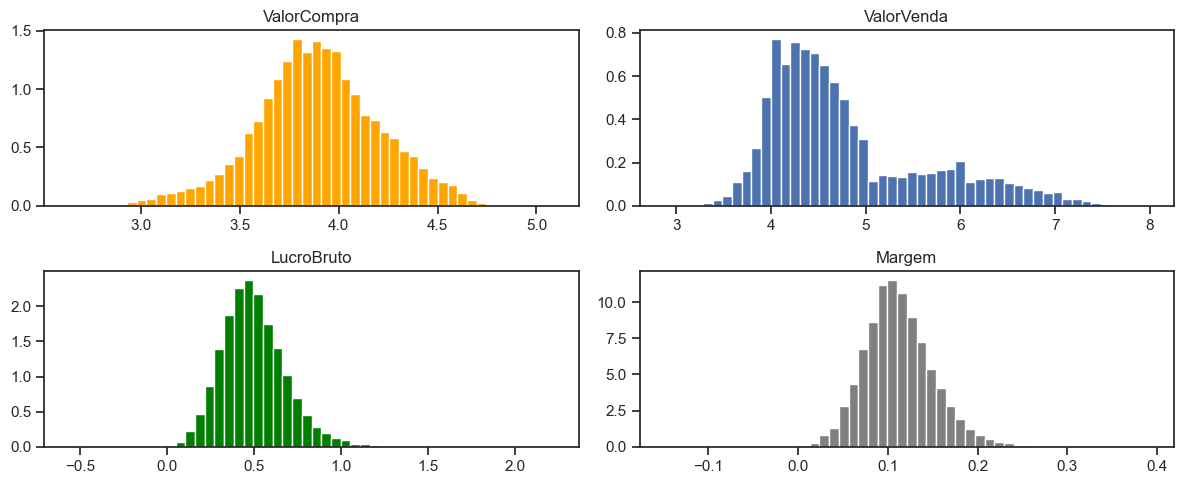

In [11]:
#Anaslisando Valores númericos
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
plt.title('ValorCompra')
plt.hist(x=dfb['ValorCompra'],color='orange',density=True,bins=50)
plt.subplot(2,2,2)
plt.title('ValorVenda')
plt.hist(x=dfb['ValorVenda'],density=True,bins=50)
plt.subplot(2,2,3)
plt.title('LucroBruto')
plt.hist(x=dfb['lucrobruto'],color='green',density=True,bins=50)
plt.subplot(2,2,4)
plt.title('Margem')
plt.hist(x=dfb['mrg'],color='gray',density=True,bins=50)
plt.tight_layout()
plt.show()

Usualmente vemos que no mercado de postos de gasolina a "briga" entre os revendedores é literalmente disputada em centavos de diferença, em relação ao preço de venda. Analisando a distribuição das variáveis **ValorCompra, ValorVenda, LucroBruto e Margem** podemos visualizar o motivo. Distribuições muito homogêneas, semelhantes a uma distribuição Gaussiana (Normal).

Outro ponto, na preparação inicial dos dados, verificamos que 548.260 registros de compra estão vazios na base, podemos tentar estimar esses valores com base nos valores de margem (em percentual %) observados

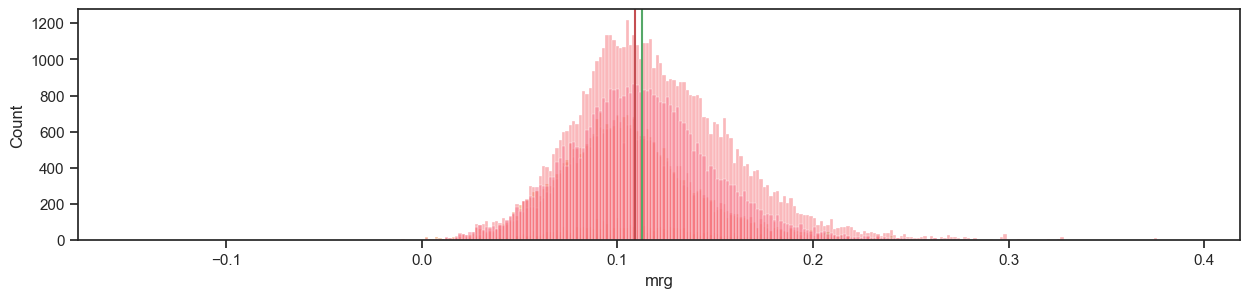

count    175292.000000
mean          0.112407
std           0.039049
min          -0.148819
25%           0.086822
50%           0.109049
75%           0.134798
max           0.391459
Name: mrg, dtype: float64


In [12]:
#Analisando distribuição das margens
plt.figure(figsize=(15,3))
data = dfb[['mrg','Bandeira']].dropna()
sb.histplot(data=data, x="mrg", hue="Bandeira", legend=False)
plt.axvline(x=dfb['mrg'].median(),color='r')
plt.axvline(x=dfb['mrg'].mean(),color='g')
plt.show()
print(dfb['mrg'].describe())

Analisando a distribuição das margens de lucros, **mesmo separando por bandeira**, observamos que realmente é uma distribuição bem homogênea, com isso temos mais segurança para inferir o preço de compra dos registros que apareceram com valores de compra zerados

Valores de Compra antes: 
 count    175292.000000
mean          3.892332
std           0.312162
min           2.635000
25%           3.700000
50%           3.888700
75%           4.090200
max           5.091000
Name: ValorCompra, dtype: float64


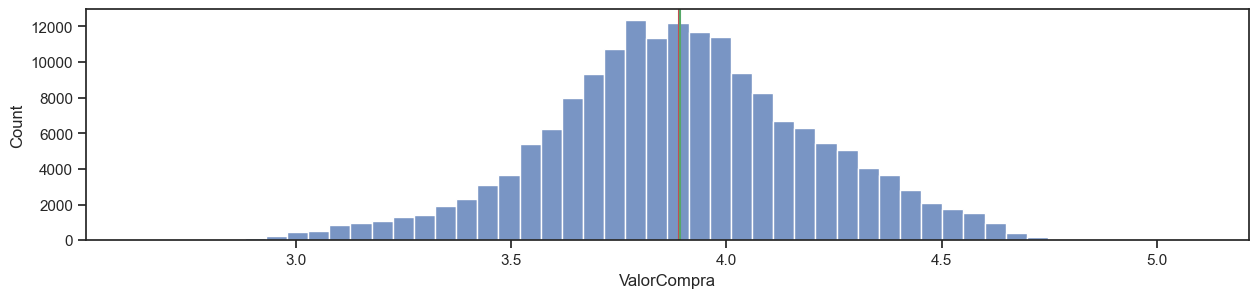

Valores de Compra Depois: 
 count    723552.000000
mean          4.261894
std           0.744670
min           2.554300
25%           3.737110
50%           4.031000
75%           4.609310
max           7.119110
Name: ValorCompra, dtype: float64


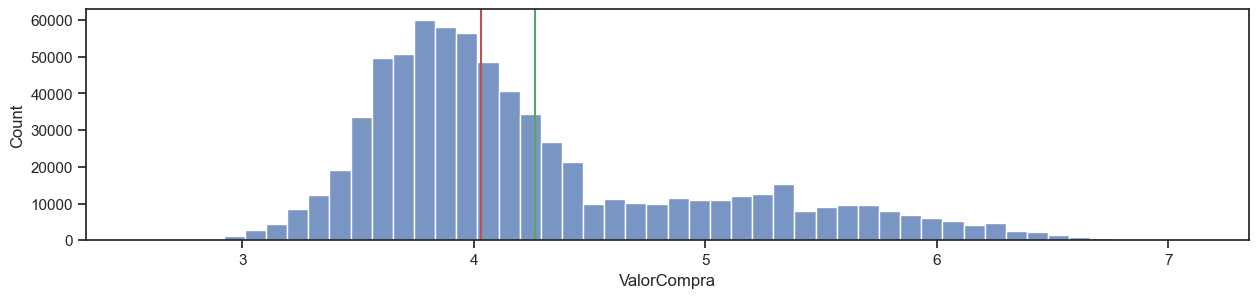

Valores de Venda: 
 count    723552.000000
mean          4.792568
std           0.835037
min           2.870000
25%           4.199000
50%           4.559000
75%           5.179000
max           7.999000
Name: ValorVenda, dtype: float64


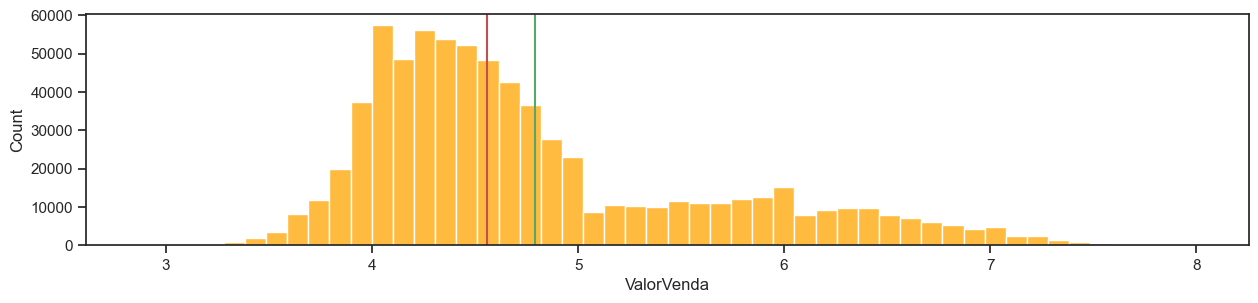

In [13]:
print(f"Valores de Compra antes: \n {dfb['ValorCompra'].describe()}")
plt.figure(figsize=(15,3))
sb.histplot(data=dfb['ValorCompra'],bins=50)
plt.axvline(x=dfb['ValorCompra'].median(),color='r')
plt.axvline(x=dfb['ValorCompra'].mean(),color='g')
plt.show()


#Pegando o intervalo de 9%-12% como margem base para preencher os valores vazios
#Lucro Bruto = ValorVenda - ValorCompra LOGO ValorCompra = ValorVenda - LucroBruto (ValorVenda * Mrg)
dfb['ValorCompra'] = dfb['ValorCompra'].fillna(dfb['ValorVenda']-dfb['ValorVenda']*np.random.choice([0.09,0.10,0.11,0.12]))

print(f"Valores de Compra Depois: \n {dfb['ValorCompra'].describe()}")
plt.figure(figsize=(15,3))
sb.histplot(data=dfb['ValorCompra'],bins=50)
plt.axvline(x=dfb['ValorCompra'].median(),color='r')
plt.axvline(x=dfb['ValorCompra'].mean(),color='g')
plt.show()

print(f"Valores de Venda: \n {dfb['ValorVenda'].describe()}")
plt.figure(figsize=(15,3))
sb.histplot(data=dfb['ValorVenda'],bins=50, color = 'orange')
plt.axvline(x=dfb['ValorVenda'].median(),color='r')
plt.axvline(x=dfb['ValorVenda'].mean(),color='g')
plt.show()



Após o tratamento dos valores vazios os valores de venda e valores de compra possuem uma distribuição muito semelhante. Agora vamos analisar os preços de compra e venda olhando a evolução ao longo dos meses, e como as outras variáveis influenciam nisso.

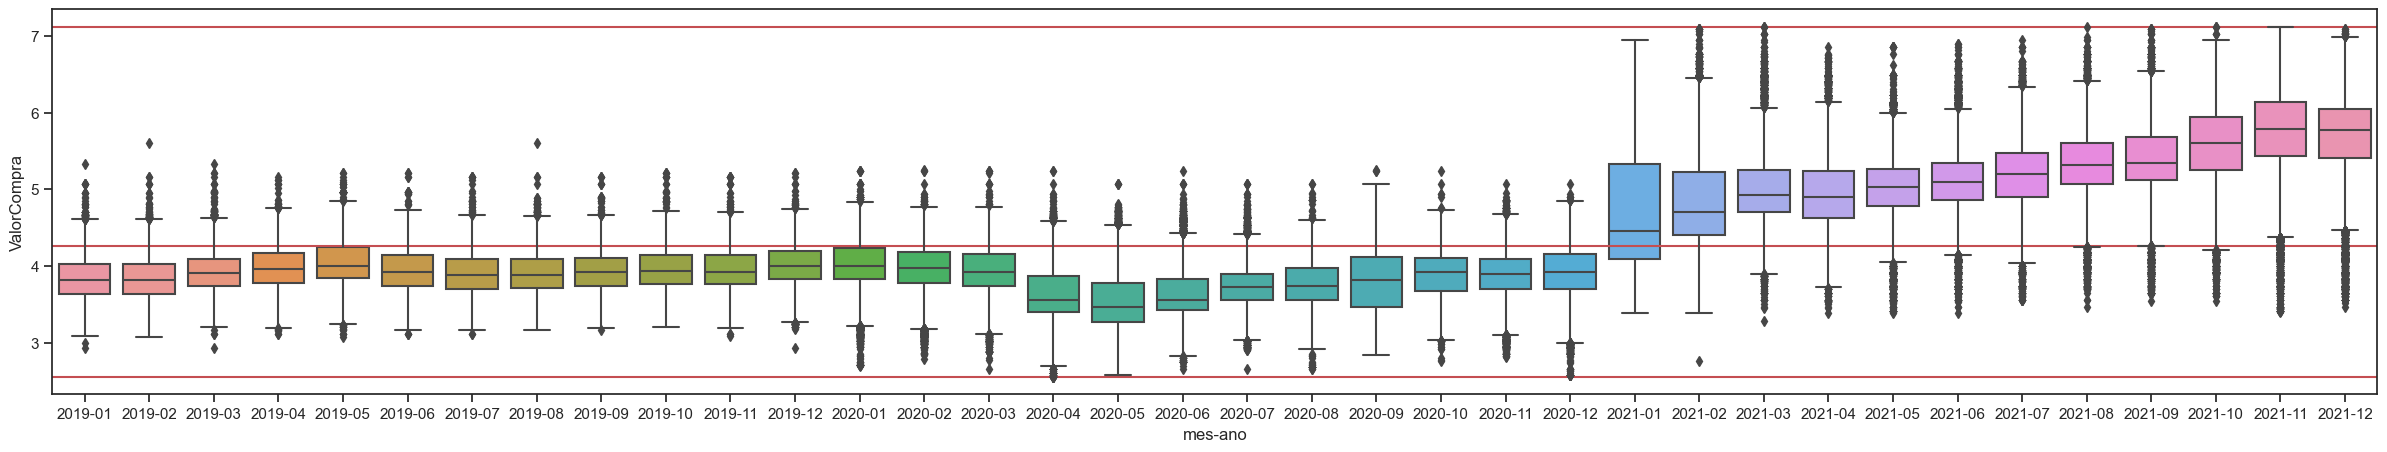

In [14]:
data = dfb[['DataColeta','mes','mes-ano','ValorCompra']]
plt.figure(figsize=(30,5))
plt.axhline(y=dfb['ValorCompra'].mean(),color='r')
plt.axhline(y=dfb['ValorCompra'].max(),color='r')
plt.axhline(y=dfb['ValorCompra'].min(),color='r')
sb.boxplot(data=dfb.sort_values('DataColeta'), x='mes-ano',y='ValorCompra')
plt.show()

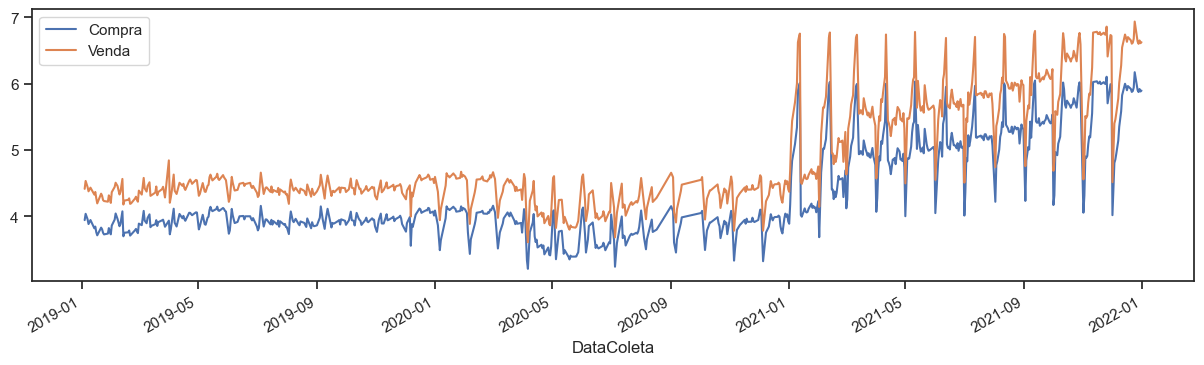

In [15]:
data = dfb[['DataColeta','ValorCompra']].groupby('DataColeta').mean()
data = data['ValorCompra']
data.plot(figsize=(15,4),label='Compra')
data = dfb[['DataColeta','ValorVenda']].groupby('DataColeta').mean()
data = data['ValorVenda']
data.plot(figsize=(15,4),label='Venda')
plt.legend()

Como esperado a partir de 2020 com a chegada da pandemia os preços começaram a ter uma variação muito grande nos valores de compras, o que obviamente reflete no valor de venda dos produtos. **Saimos de variações de em média 3,00 para incríveis 6,00 de amplitude entre os preços dentro de um mesmo mês.**

<Axes: >

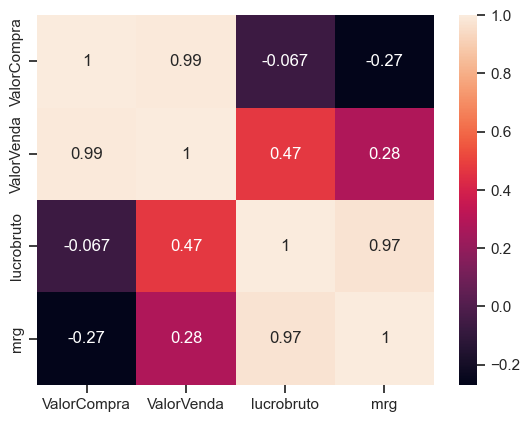

In [16]:
#Analisando Correlação de Pearson
var_numericas = ['ValorCompra','ValorVenda','lucrobruto','mrg']
sb.heatmap(data=dfb[var_numericas].corr(),annot=True)

Estudando a correlação de pearson entre as variaveis númericas podemos observar que o valor de venda e compra estão intimamente ligados, mas como visto anteriormente os valores de vendas se ajustam com o principal foco de manter uma margem mínima, não a maior possível.

# Análise Exploratória - Variáveis Qualitativas

***
Vamos analisar como o Valor de Compra se comporta em relação a:
- Bandeira
- Estado
- Municipio


***
**BANDEIRA**

In [17]:
top5 = dfb[['Bandeira']].value_counts()
top5 = top5.head(5)
print(top5)

Bandeira                    
BRANCA                          260102
PETROBRAS DISTRIBUIDORA S.A.    125549
IPIRANGA                        123063
RAIZEN                          112353
VIBRA ENERGIA                    37684
Name: count, dtype: int64


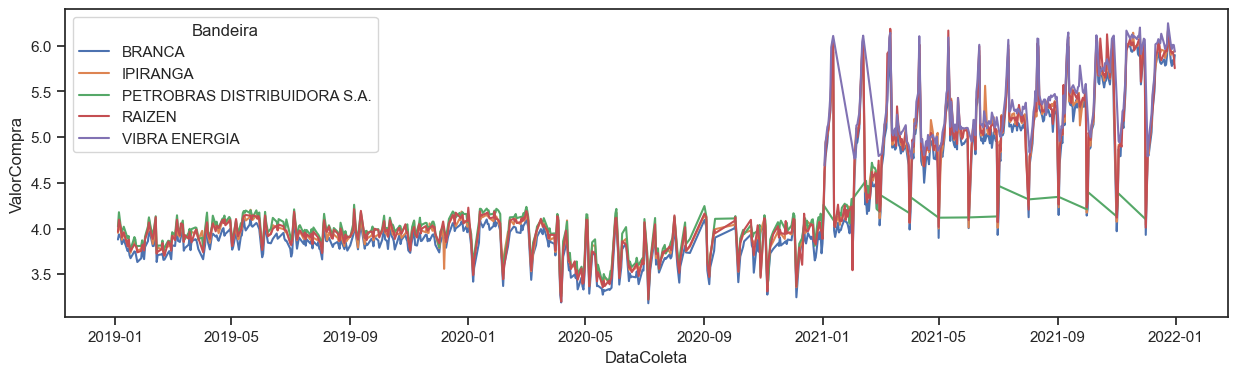

In [18]:
#Criando listas com top5 bandeiras que mais apareceram na base
bandeiras = list(top5.index)
bandeiras_tratadas = []
for i in bandeiras:
    bandeiras_tratadas.append(i[0])
    
data = dfb.loc[dfb['Bandeira'].isin(bandeiras_tratadas)]
data = data.groupby(['DataColeta','Bandeira'])['ValorCompra'].mean()
data = data.reset_index()
plt.figure(figsize=(15,4))
sb.lineplot(data, x='DataColeta',y='ValorCompra',hue='Bandeira')
plt.show()

As top5 distribuidoras se comportaram de maneira muito homogenea durante os meses, **exceto em 2021** quando a Petrobras se mostrou como a alternativa mais barata, o que desperta curiosidade, pois a VIBRA ENERGIA seria o novo nome da BR DISTRIBUIDORA (Distribuidora da Petrobras)

C:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 129 (\x81) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 141 (\x8d) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 130 (\x82) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io

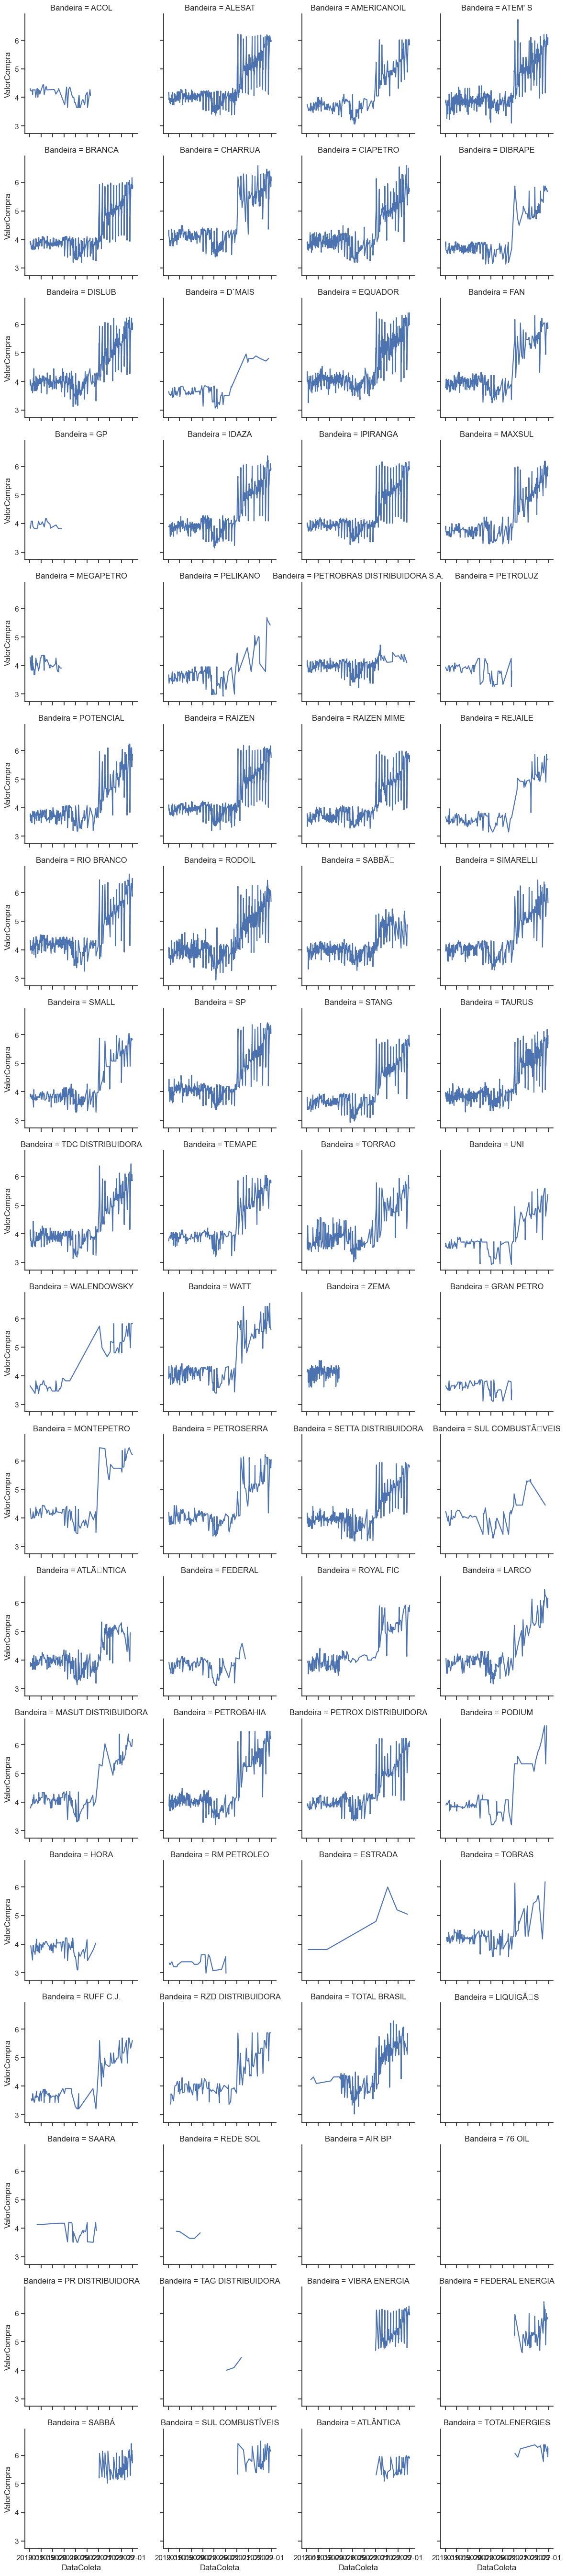

In [41]:
data = dfb.groupby(['DataColeta','Bandeira'])['ValorCompra'].mean()
data = data.reset_index()

grid = sb.FacetGrid(data,col='Bandeira',col_wrap=4,dropna=True)
grid.map(sb.lineplot, 'DataColeta', 'ValorCompra')
plt.show()

No cenário geral, a maioria das **bandeiras** com o passar do tempo, aumentaram seu **ValorCompra**

***
**ESTADO**

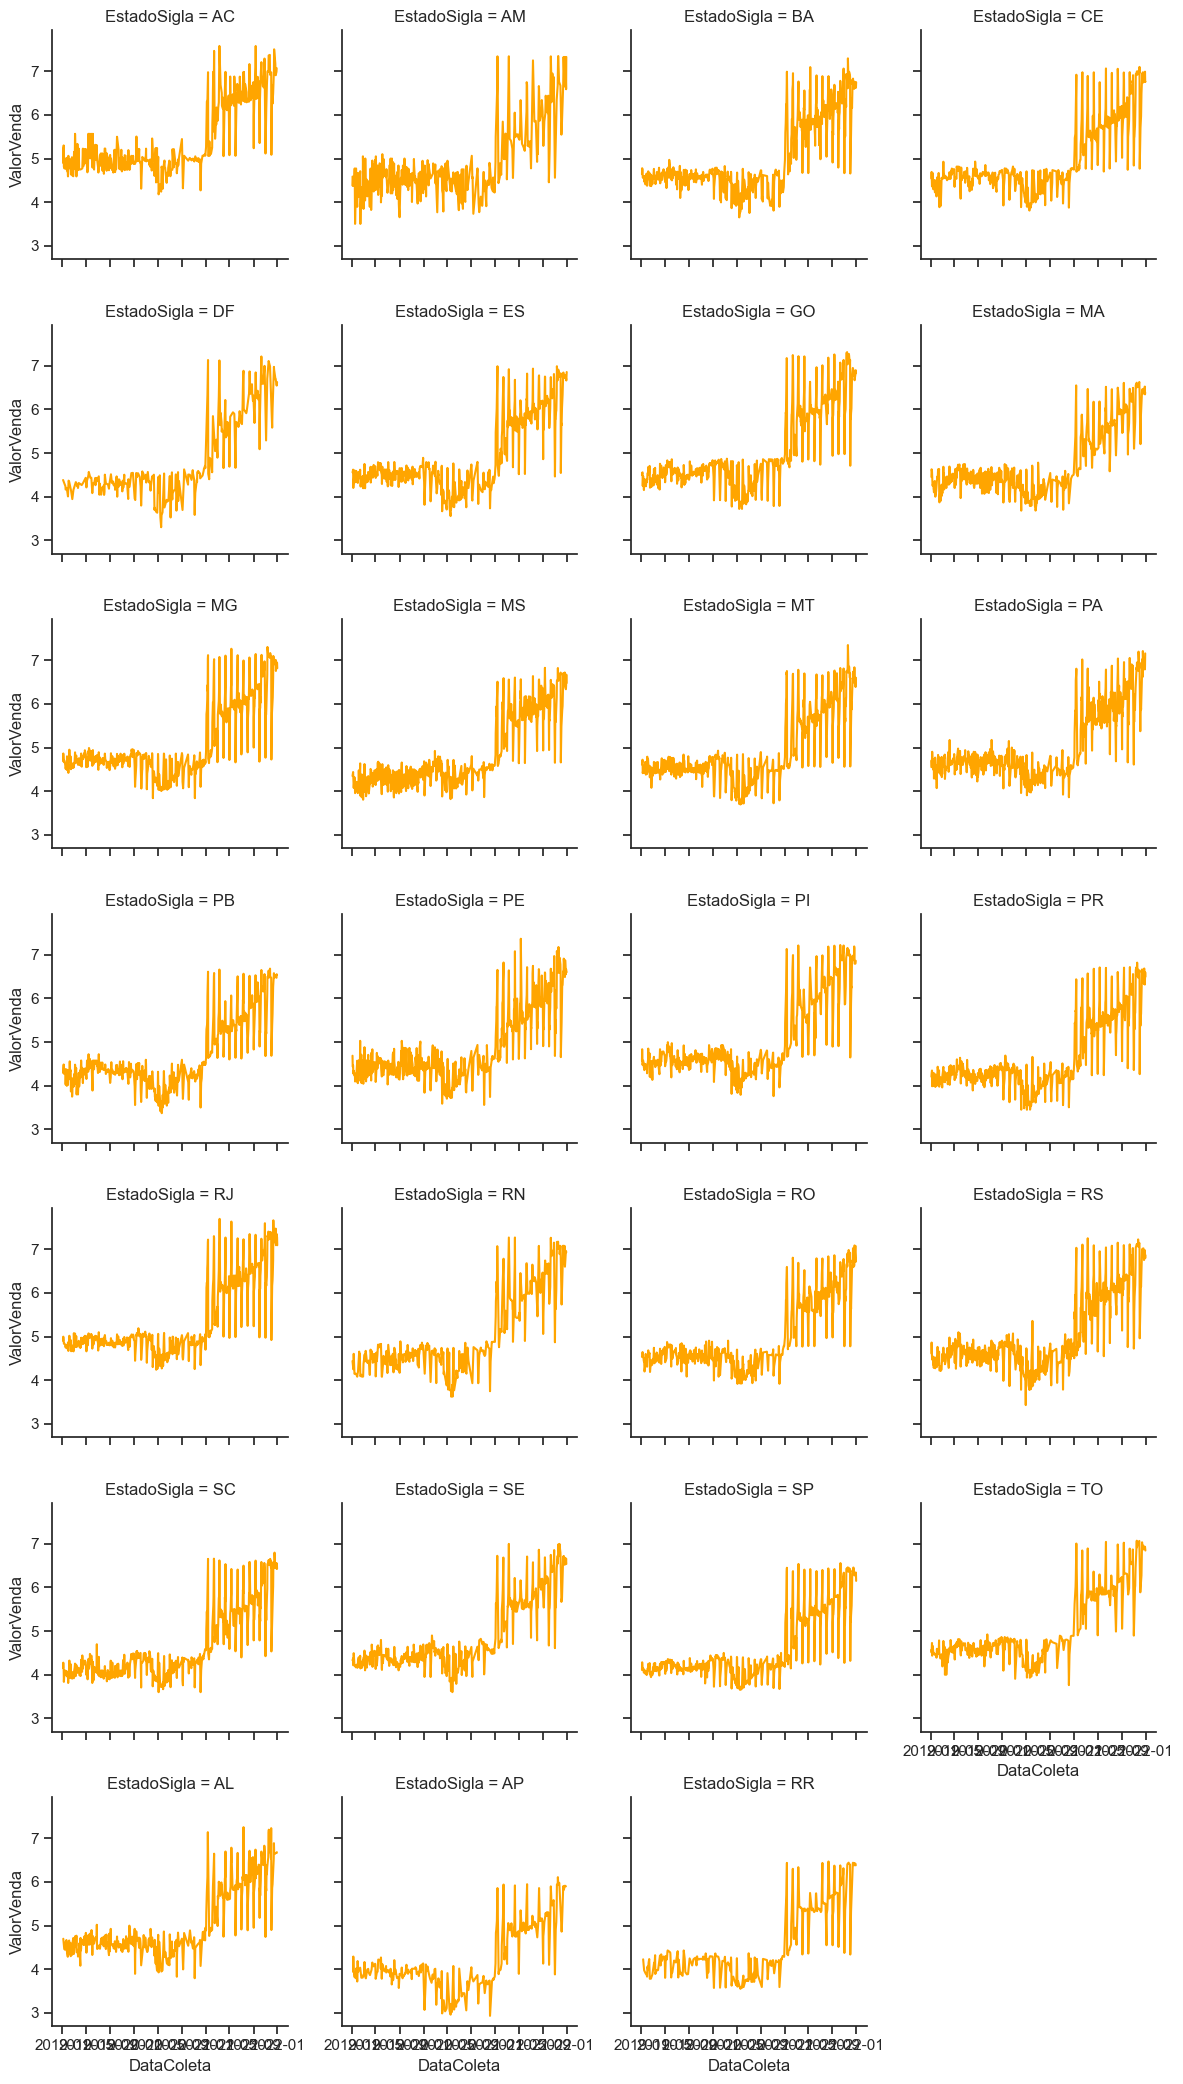

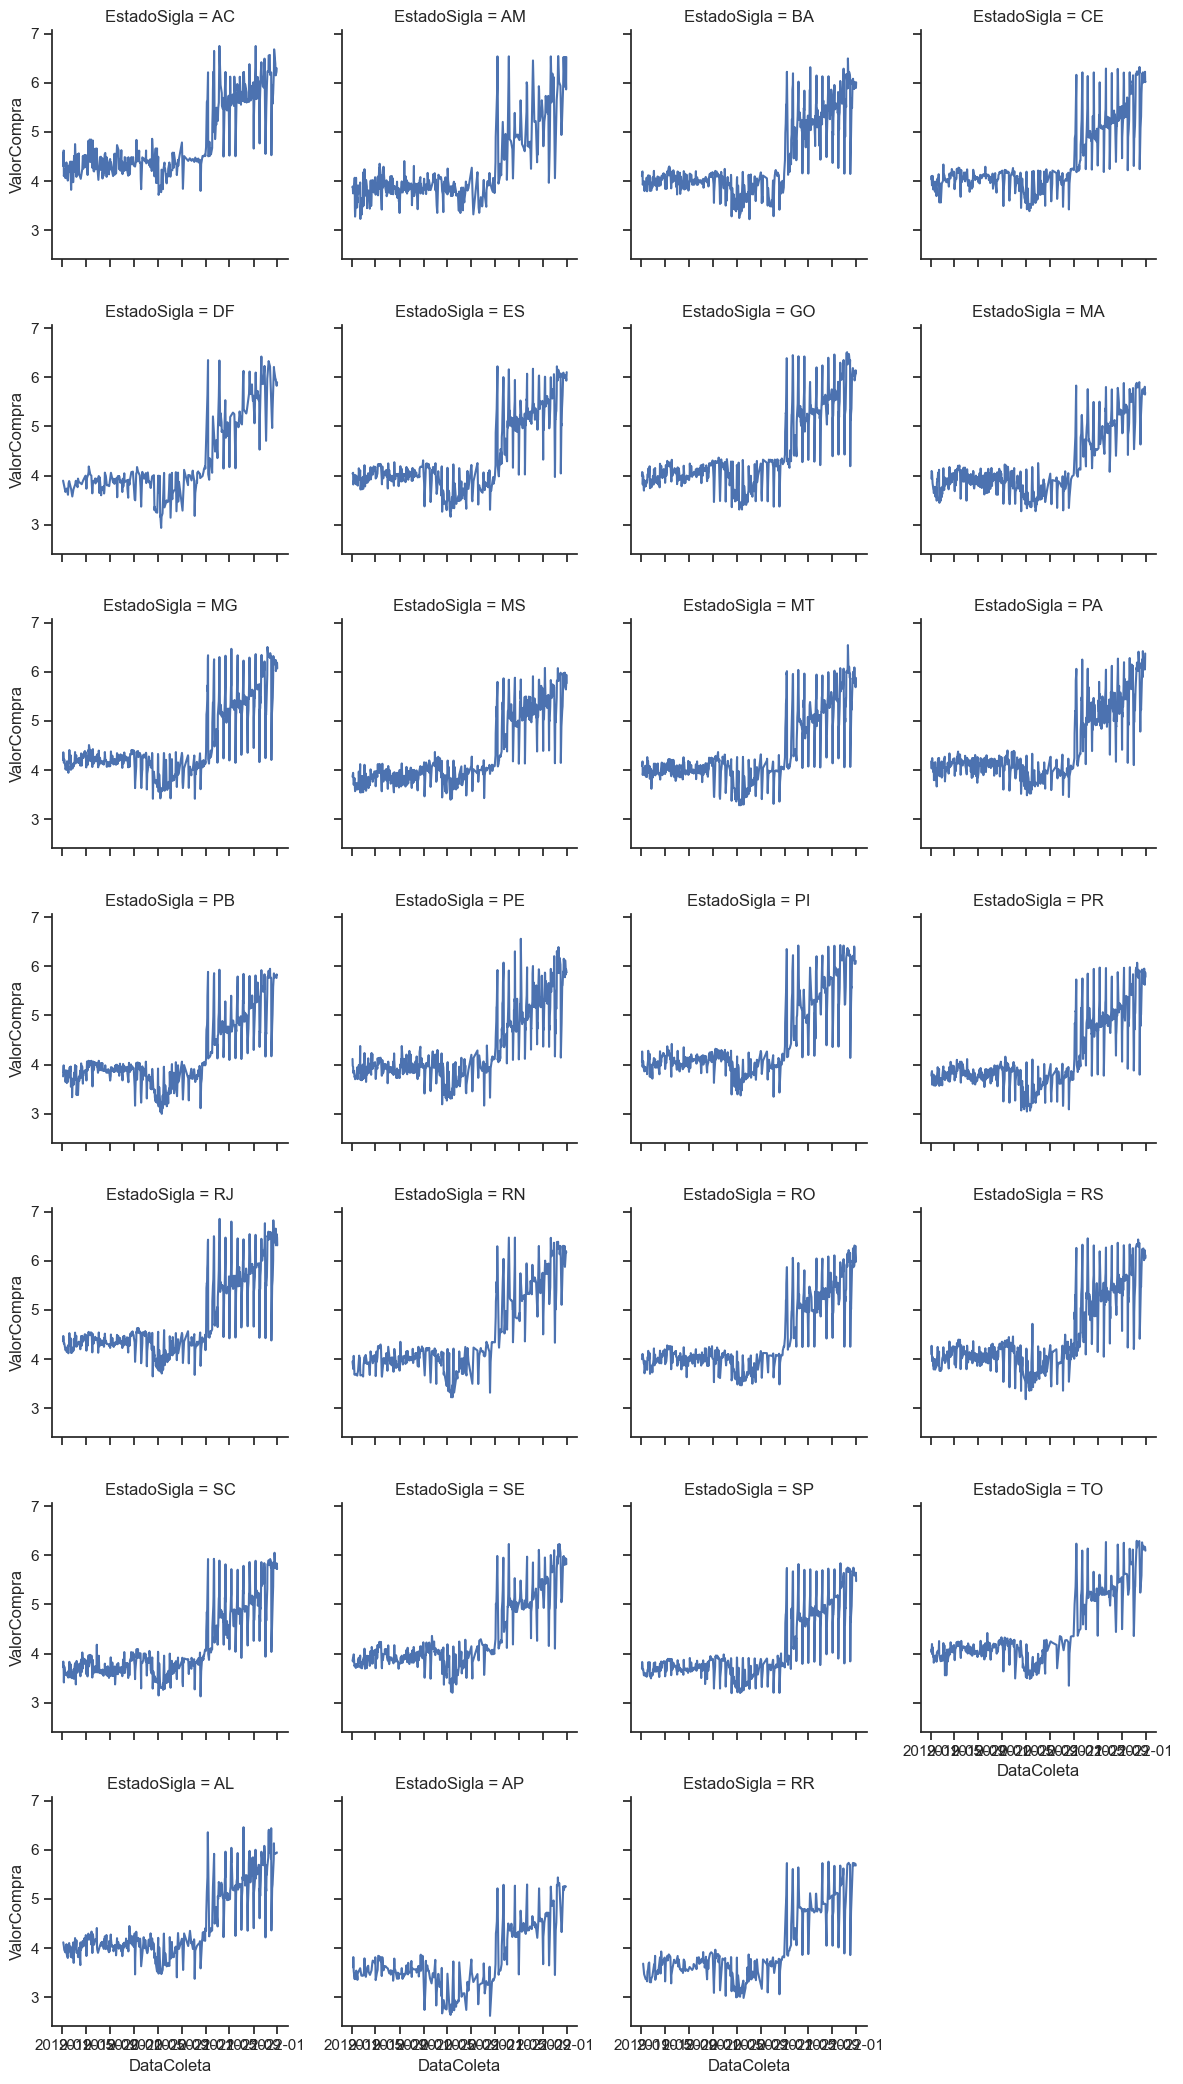

In [60]:
#Evolução ao longo do tempo (2019-2021)
data = dfb.groupby(['DataColeta','EstadoSigla'])[['ValorVenda','ValorCompra']].mean()
data = data.reset_index()

grid = sb.FacetGrid(data,col='EstadoSigla',col_wrap=4)
grid.map(sb.lineplot, 'DataColeta', 'ValorVenda',color='orange')
plt.show()

grid = sb.FacetGrid(data,col='EstadoSigla',col_wrap=4)
grid.map(sb.lineplot, 'DataColeta', 'ValorCompra')
plt.show()

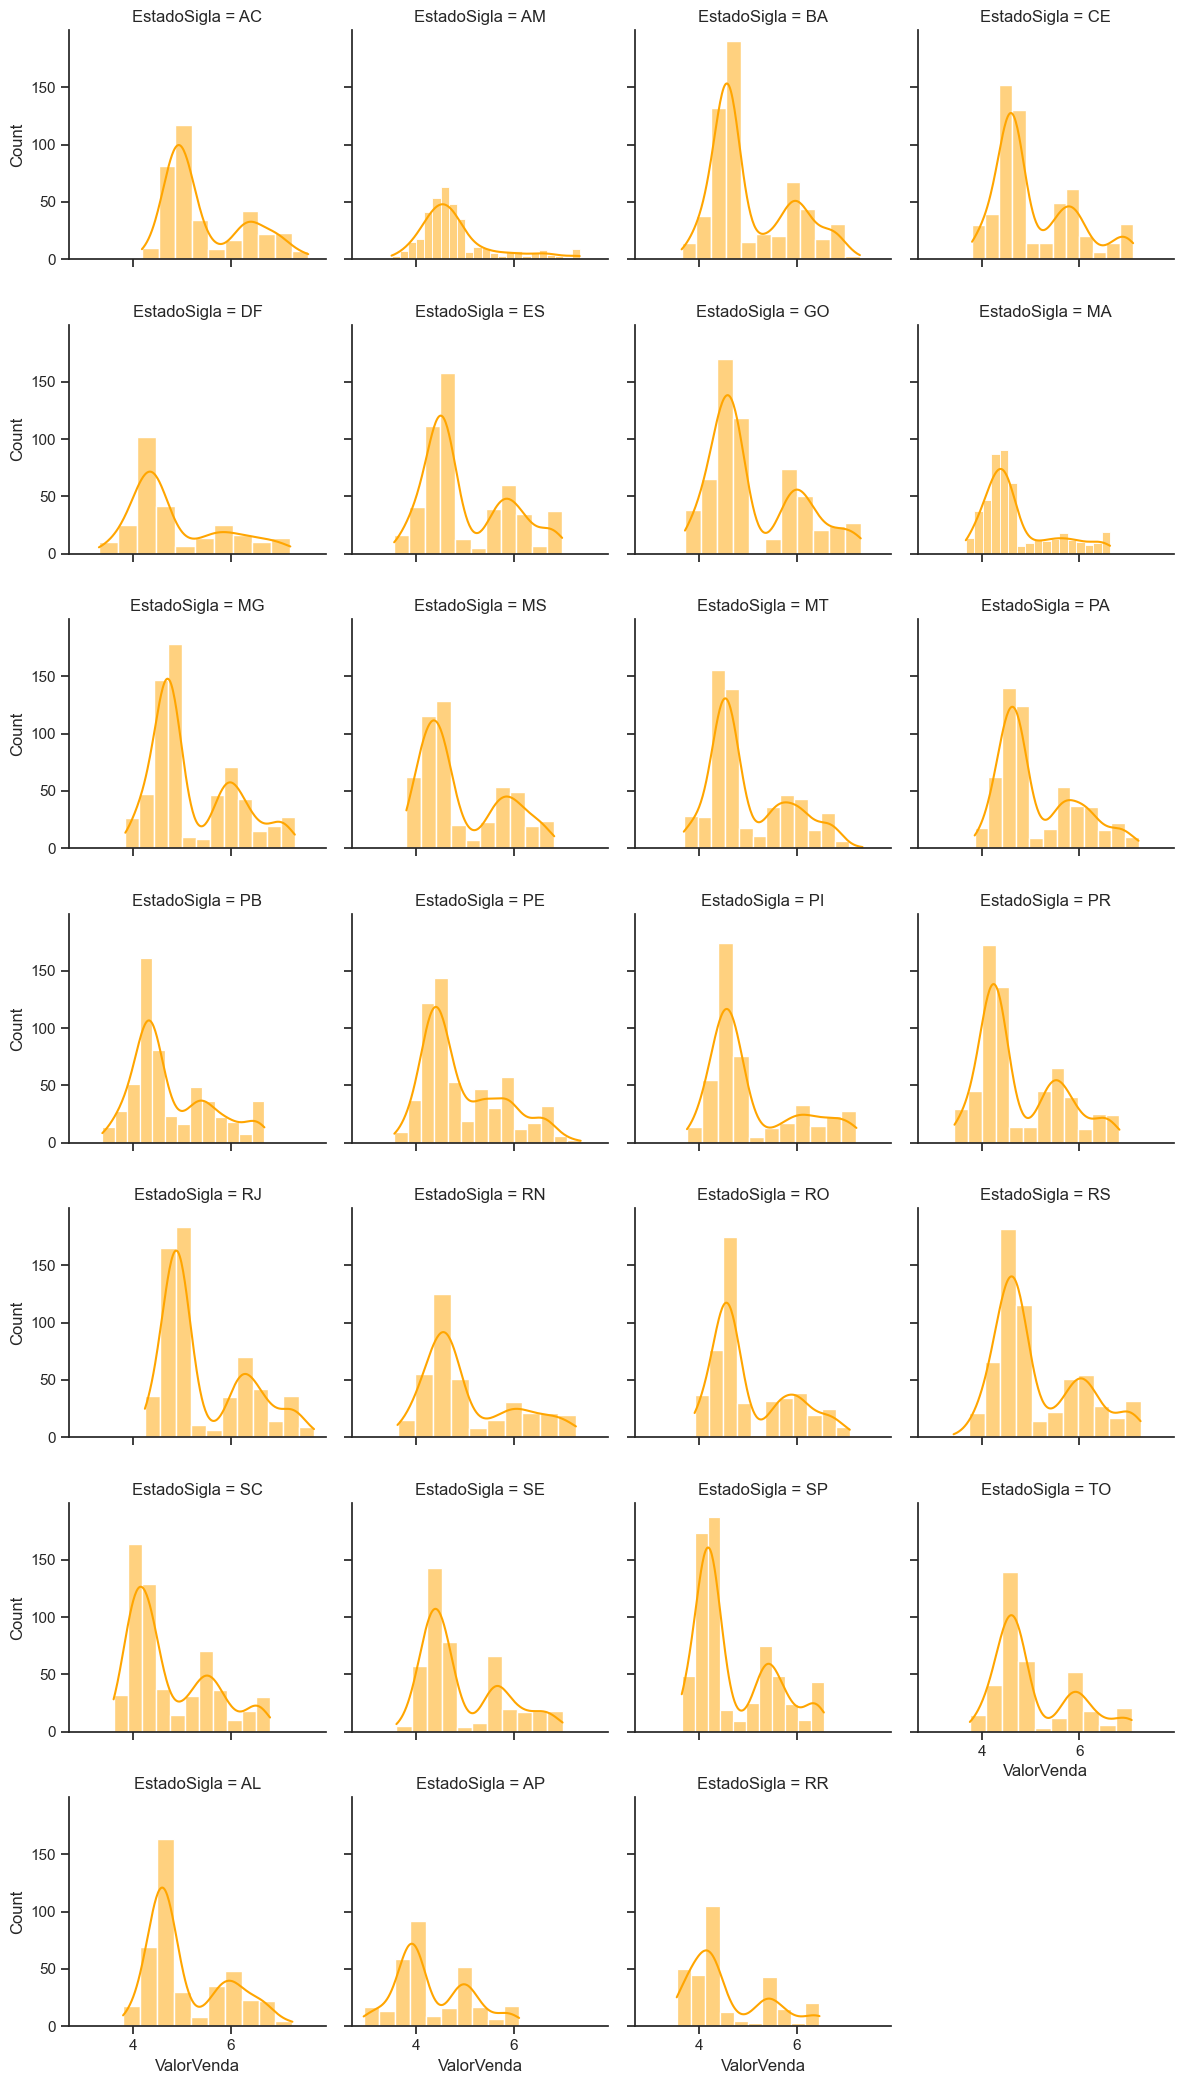

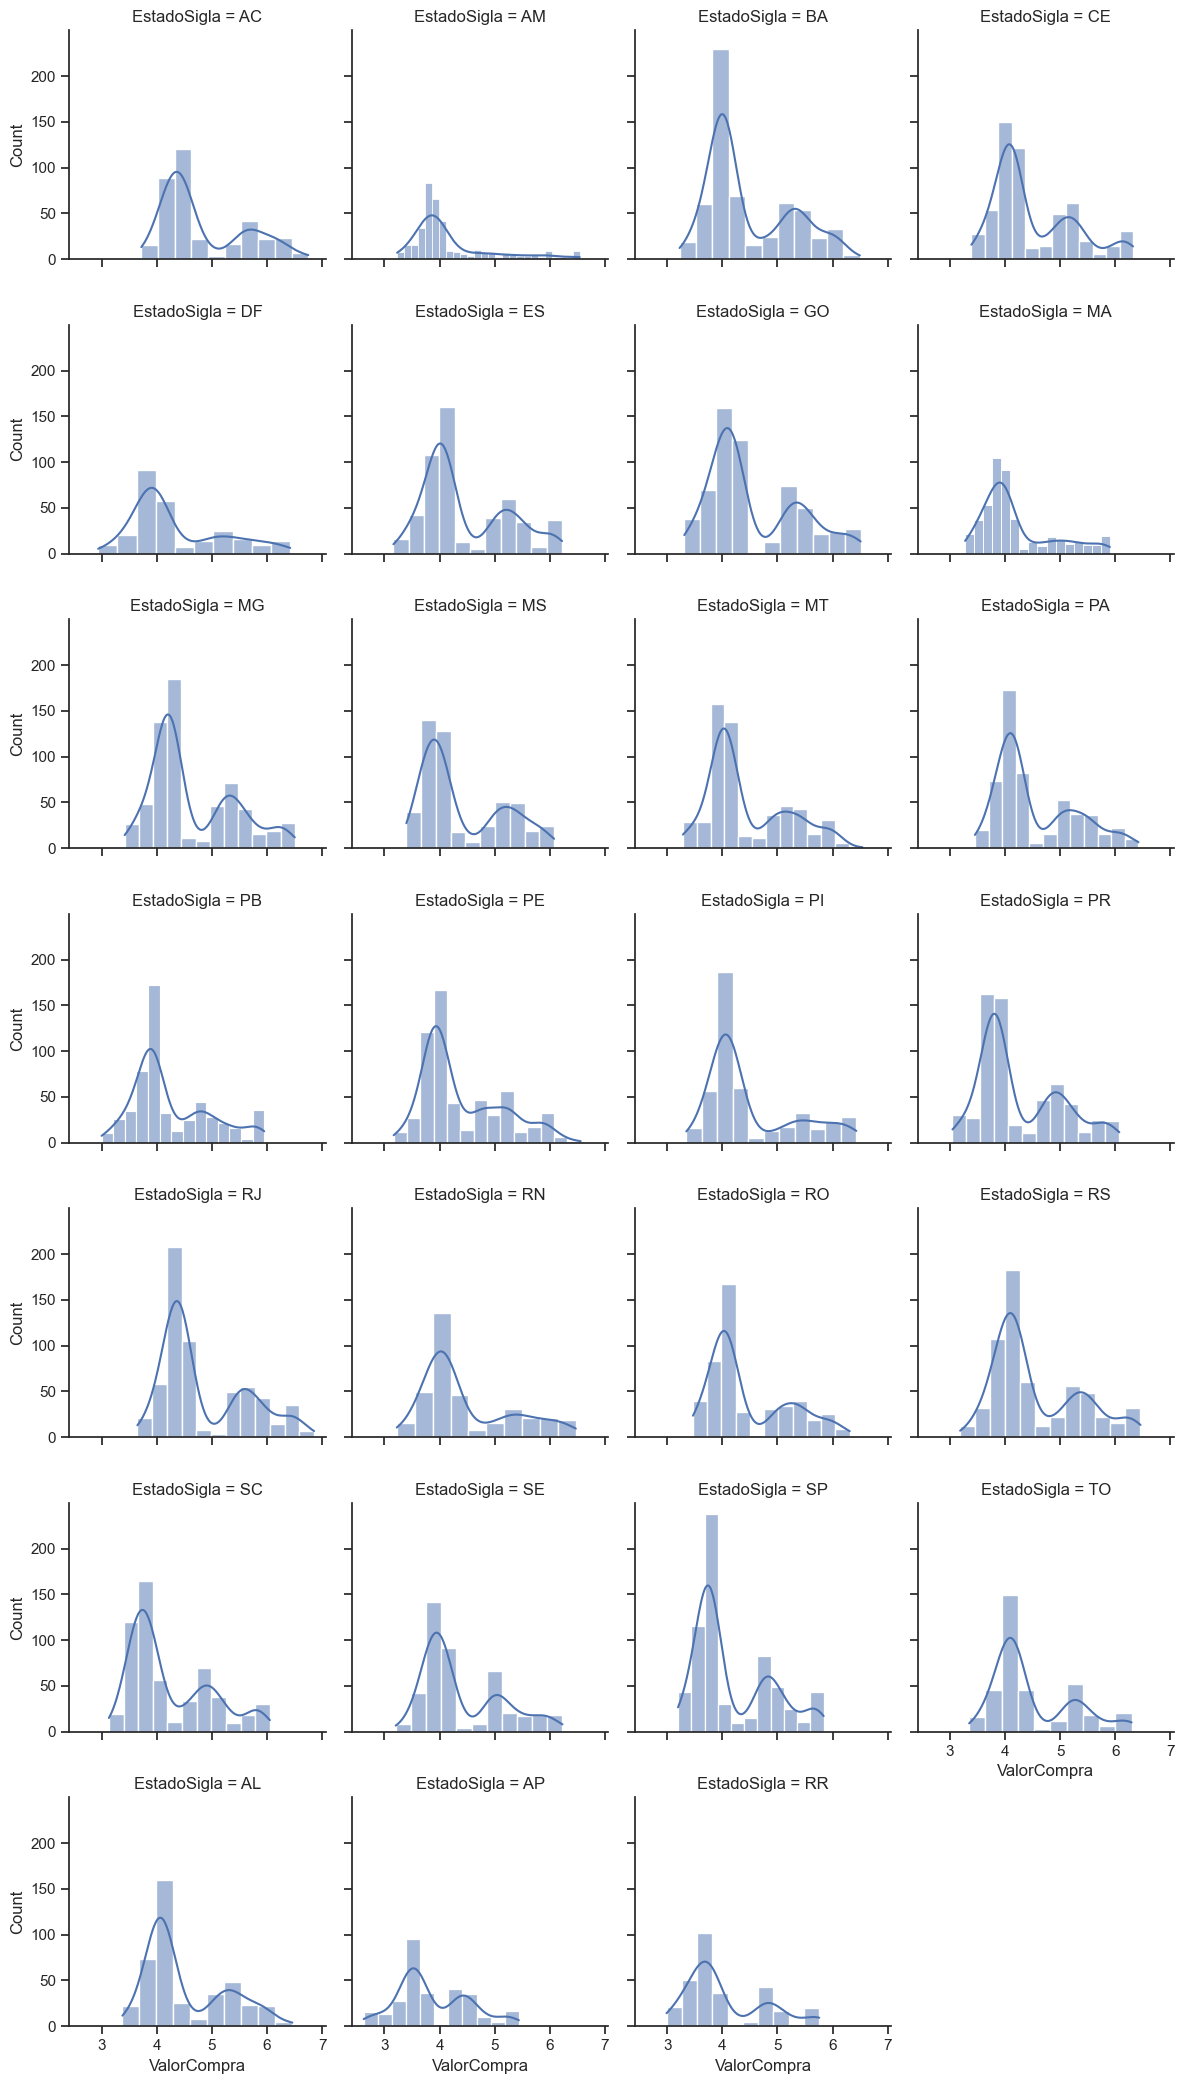

In [65]:
#Distribuição
data = dfb.groupby(['DataColeta','EstadoSigla'])[['ValorVenda','ValorCompra']].mean()
data = data.reset_index()

grid = sb.FacetGrid(data,col='EstadoSigla',col_wrap=4)
grid.map(sb.histplot, 'ValorVenda',kde=True,color='orange')
plt.show()

grid = sb.FacetGrid(data,col='EstadoSigla',col_wrap=4)
grid.map(sb.histplot, 'ValorCompra',kde=True)
plt.show()

Como esperado, os valores de venda e compra entre os estados são bastante semelhantes. O que corrobora a observação inicial de que não iríamos encontrar muitas variações nesses valores. **Exceto, quando olhamos a evolução deles ao longo das datas analisadas.**

***
**MUNICIPIO**